# Template Matching
Questions 3.1 - 3.2

(1258, 74) (1289, 111)


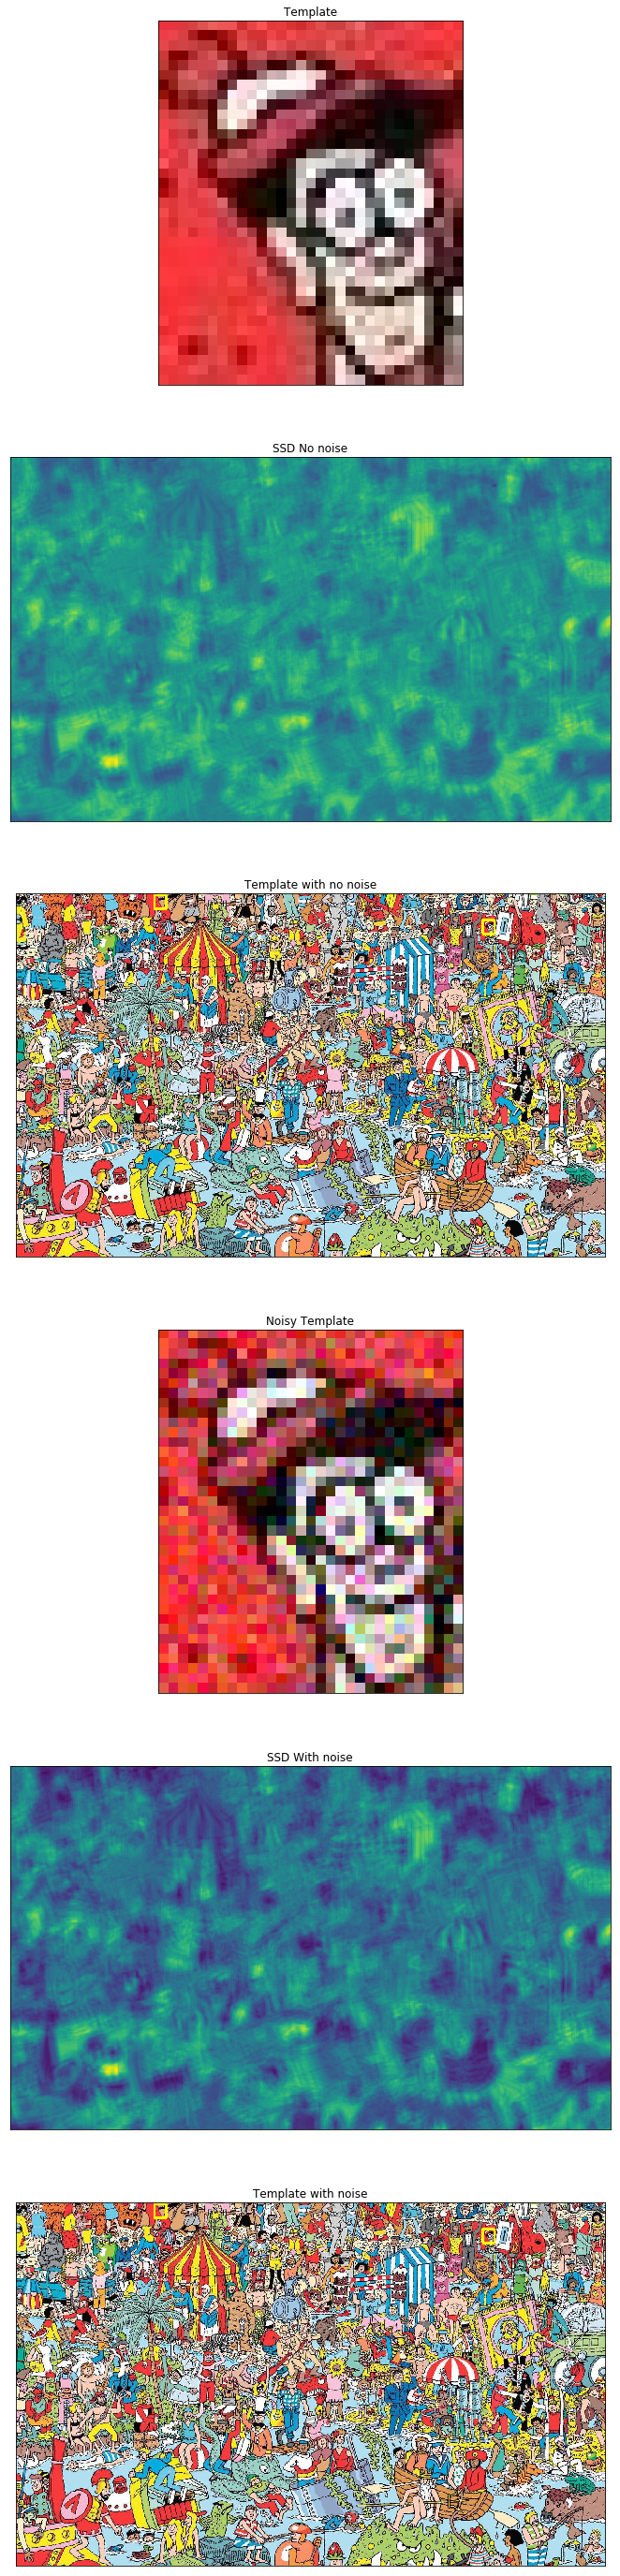

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.measure

# Load image
imgBackground = cv2.imread("where_is_waldo.jpg")
imgBackground = cv2.cvtColor(imgBackground, cv2.COLOR_BGR2RGB)
img_draw = imgBackground
img_draw2 = imgBackground
imgTemplate = cv2.imread("template1.png")
imgTemplate = cv2.cvtColor(imgTemplate, cv2.COLOR_BGR2RGB)
imgTemplateNoisy = cv2.imread("template2.png")
imgTemplateNoisy = cv2.cvtColor(imgTemplateNoisy, cv2.COLOR_BGR2RGB)

# iterate over the background image using the template
height, width = imgTemplate.shape[0:2]


# compute SSD matrix
SSD = cv2.matchTemplate(imgBackground, imgTemplate, cv2.TM_SQDIFF)

threshold = 0.8

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(SSD)

top_left = min_loc
bottom_right = (top_left[0] + width, top_left[1] + height)
print(top_left, bottom_right)
cv2.rectangle(img_draw,top_left, bottom_right, (255,255,0), 5)

#loc = np.where(SSD >= threshold)
#for pt in zip(*loc[::-1]):
    # cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) → None
    # This function will re-write the pixels around the found points
#    cv2.rectangle(img_draw, pt, (pt[0]+width, pt[1]+height), (255,255,0), 5)

# Repeat for noisy template
SSDNoise = cv2.matchTemplate(imgBackground, imgTemplate, cv2.TM_SQDIFF)

# locNoise = np.where(SSDNoise >= threshold)


min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(SSDNoise)

top_left = min_loc
bottom_right = (top_left[0] + width, top_left[1] + height)
cv2.rectangle(img_draw2,top_left, bottom_right, (255,255,0), 5)
#for pt in zip(*locNoise[::-1]):
    # cv2.rectangle(img, pt1, pt2, color[, thickness[, lineType[, shift]]]) → None
    # This function will re-write the pixels around the found points
#    cv2.rectangle(img_draw2, pt, (pt[0]+width, pt[1]+height), (255,255,0), 5)
    
# Display images

images = [imgTemplate, SSD, img_draw, imgTemplateNoisy, SSDNoise, img_draw2]
titles = ["Template","SSD No noise","Template with no noise","Noisy Template","SSD With noise","Template with noise"]

plt.figure(figsize=(50,50))
for i in range(6):
    plt.subplot(6,1,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

